In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0  # Normalize pixel values to [0,1]
x_test = x_test / 255.0

In [3]:
# Flatten images from (28,28) to (784,)
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

In [4]:
# Convert to DataFrame and add label column
train_df = pd.DataFrame(x_train_flat)
train_df['label'] = y_train

test_df = pd.DataFrame(x_test_flat)
test_df['label'] = y_test

In [5]:
train_df.head()  # Shows first few rows of training data
test_df.head()   # Shows first few rows of test data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [6]:
model = Sequential([
    Input(shape=(28*28,)),             # Explicit input layer
    Dense(128, activation='relu'),     # No input_shape here!
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
# Compile the model with an optimizer, loss function, and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Tunable learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
print(model)
print(model.compile)

<Sequential name=sequential, built=True>
<bound method Trainer.compile of <Sequential name=sequential, built=True>>


In [9]:
# Train the model
history = model.fit(
    x_train_flat, y_train,
    epochs=10,
    batch_size=32,  # Tunable batch size
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9184 - loss: 0.2796 - val_accuracy: 0.9573 - val_loss: 0.1444
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9651 - loss: 0.1150 - val_accuracy: 0.9673 - val_loss: 0.1069
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9752 - loss: 0.0805 - val_accuracy: 0.9692 - val_loss: 0.1020
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9816 - loss: 0.0569 - val_accuracy: 0.9661 - val_loss: 0.1177
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9847 - loss: 0.0457 - val_accuracy: 0.9746 - val_loss: 0.0909
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9883 - loss: 0.0368 - val_accuracy: 0.9721 - val_loss: 0.1067
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9896 - loss: 0.0315 - val_accuracy: 0.9757 - val_loss: 0.0891
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9912 - loss: 0.0258 - 

In [10]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test_flat, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0966    
Test loss: 0.0966, Test accuracy: 0.9765


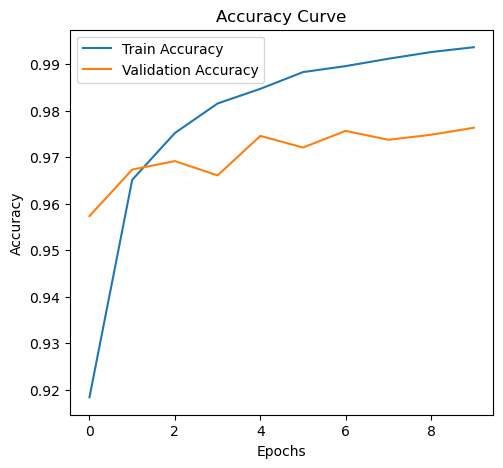

In [11]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

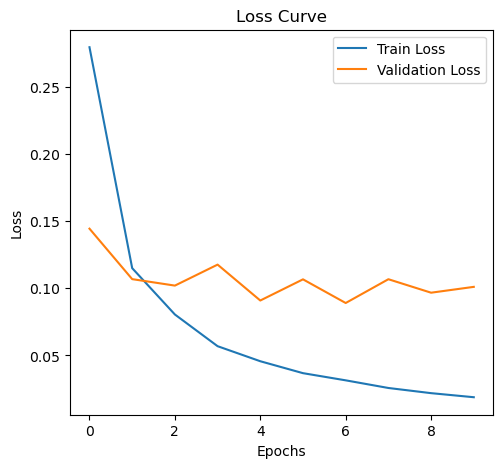

In [12]:
# loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()